In [1]:
 %reload_ext autoreload

import torch
import torch.nn.functional as F
import model, utils
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms

In [2]:
device = utils.get_device()

CUDA Available:  False


In [3]:
x, y = 28, 28
mean = 0.1307
std = 0.3081

In [4]:
train_transforms = transforms.Compose([
                    # Instead of 22 it would be random later on
                    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
                    transforms.Resize((x,  y)),
                    transforms.RandomRotation((-15., 15.), fill=0),
                    transforms.ToTensor(),
                    transforms.Normalize((mean,), (std,)),
                    ])
test_transforms = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((mean,), (std,))
                    ])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

/home/vmistry/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
batch_size = 256

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

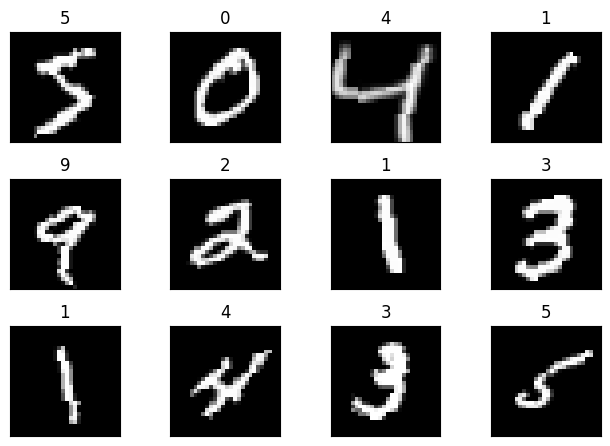

In [7]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [8]:
cnn_model = utils.send_model_to_device(model.Net, device)

In [9]:
optimizer = optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5, verbose=True)

Adjusting learning rate of group 0 to 1.0000e-02.


In [10]:
utils.run_for_epoch(10, cnn_model, device, train_loader, test_loader, optimizer, scheduler)
utils.get_model_summary(cnn_model, device, x, y)

Epoch 1


Train: Loss=0.3322 Batch_id=234 Accuracy=79.45: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [02:06<00:00,  1.86it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.1722, Accuracy: 56745/60000 (94.58%)

Epoch 2


Train: Loss=0.2485 Batch_id=234 Accuracy=96.27: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [02:04<00:00,  1.89it/s]

Adjusting learning rate of group 0 to 5.0000e-03.


Test set: Average loss: 0.0905, Accuracy: 58297/60000 (97.16%)

Epoch 3


Train: Loss=0.2526 Batch_id=234 Accuracy=97.60: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [02:04<00:00,  1.89it/s]

Adjusting learning rate of group 0 to 5.0000e-03.


Test set: Average loss: 0.0685, Accuracy: 58705/60000 (97.84%)

Epoch 4


Train: Loss=0.2173 Batch_id=234 Accuracy=97.96: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [02:03<00:00,  1.90it/s]

Adjusting learning rate of group 0 to 2.5000e-03.


Test set: Average loss: 0.0595, Accuracy: 58896/60000 (98.16%)

Epoch 5


Train: Loss=0.2008 Batch_id=234 Accuracy=98.25: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:58<00:00,  1.98it/s]

Adjusting learning rate of group 0 to 2.5000e-03.


Test set: Average loss: 0.0547, Accuracy: 58961/60000 (98.27%)

Epoch 6


Train: Loss=0.2043 Batch_id=234 Accuracy=98.41: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [02:11<00:00,  1.79it/s]

Adjusting learning rate of group 0 to 1.2500e-03.


Test set: Average loss: 0.0491, Accuracy: 59053/60000 (98.42%)

Epoch 7


Train: Loss=0.2168 Batch_id=234 Accuracy=98.50: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:58<00:00,  1.98it/s]

Adjusting learning rate of group 0 to 1.2500e-03.


Test set: Average loss: 0.0470, Accuracy: 59126/60000 (98.54%)

Epoch 8


Train: Loss=0.1984 Batch_id=234 Accuracy=98.56: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [02:07<00:00,  1.84it/s]

Adjusting learning rate of group 0 to 6.2500e-04.


Test set: Average loss: 0.0446, Accuracy: 59182/60000 (98.64%)

Epoch 9


Train: Loss=0.1960 Batch_id=234 Accuracy=98.64: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [02:16<00:00,  1.73it/s]

Adjusting learning rate of group 0 to 6.2500e-04.


Test set: Average loss: 0.0449, Accuracy: 59174/60000 (98.62%)

Epoch 10


Train: Loss=0.1957 Batch_id=234 Accuracy=98.61: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [02:06<00:00,  1.86it/s]

Adjusting learning rate of group 0 to 3.1250e-04.


Test set: Average loss: 0.0425, Accuracy: 59191/60000 (98.65%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


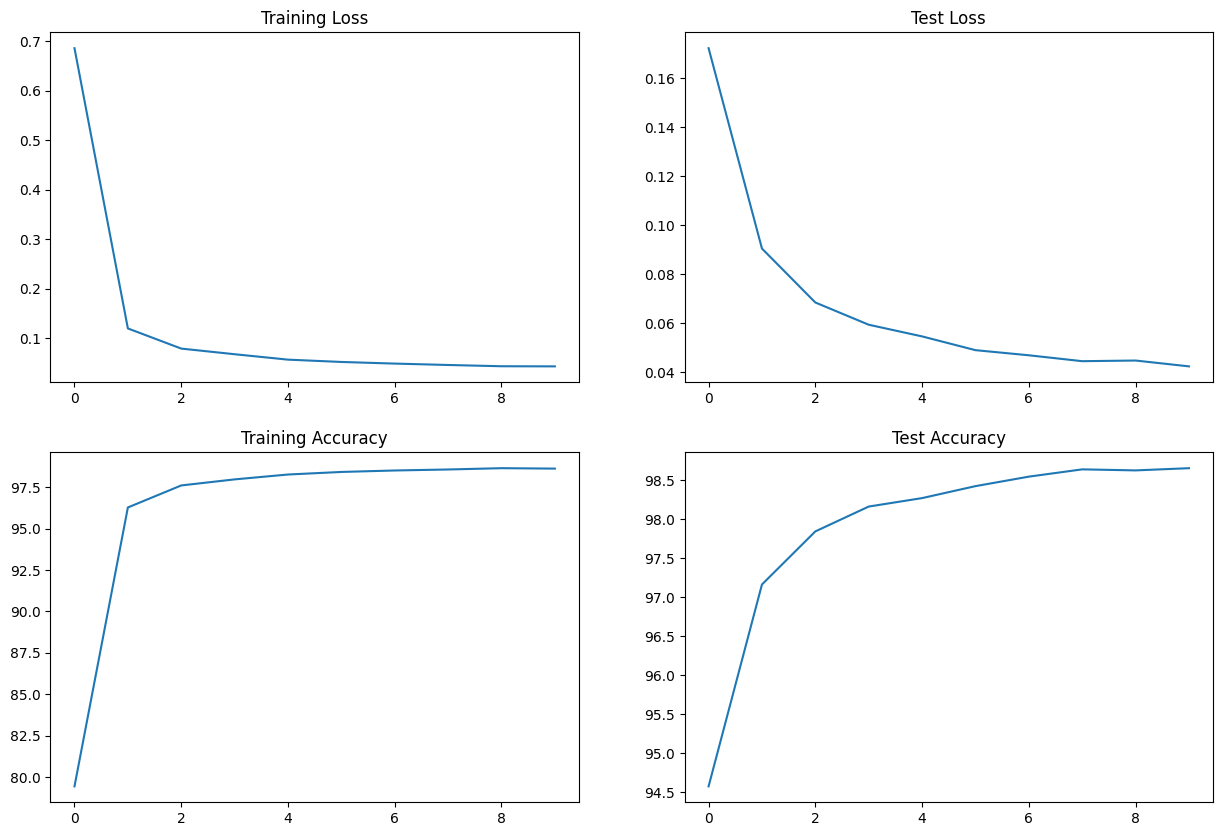

In [11]:
utils.plot_loss_accuracy_graph()